# Project: Investigating Medical Appointment No Shows

by Deepesh Yadav
(12/04/2020)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

This project is a way to apply the skills I have learned in the module Introduction to Data Analysis. In this project I have investigated a dataset of medical appointment records of public hospitals Brasil.The dataset has some key features like Neighbourhood,Alcoholism,Scholarship, etc. which can help to find the patterns in the dataset.

Link to dataset: https://www.kaggle.com/joniarroba/noshowappointments

### Dataset Description
<table>
    <tr>
        <th>Name</th>
        <th>Value(s)</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>PatienID</td>
        <td>number</td>
        <td>identification of a patient</td>
    </tr>
    <tr>
        <td>AppointmentID</td>
        <td>number</td>
        <td>identification of each appointment</td>
    </tr>
    <tr>
        <td>Gender</td>
        <td>F or M</td>
        <td>it says 'F' if female or 'M' if man</td>
    </tr>
    <tr>
        <td>ScheduledDay</td>
        <td>date</td>
        <td>tells us on what day the patient set up their appointment</td>
    </tr>
    <tr>
        <td>AppointmentDay</td>
        <td>date</td>
        <td>the day of the actuall appointment, when they have to visit the doctor</td>
    </tr>
    <tr>
        <td>Age</td>
        <td>number</td>
        <td>how old is the patient</td>
    </tr>
    <tr>
        <td>Neighbourhood</td>
        <td>string</td>
        <td>indicates the location of the hospital</td>
    </tr>
    <tr>
        <td>Scholarship</td>
        <td>0 or 1</td>
        <td>indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família</td>
    </tr>
    <tr>
        <td>Hipertension</td>
        <td>0 or 1</td>
        <td>indicates if the patient has hipertension</td>
    </tr>
    <tr>
        <td>Diabetes</td>
        <td>0 or 1</td>
        <td>indicates if the patient has diabetes</td>
    </tr>
    <tr>
        <td>Alcoholism</td>
        <td>0 or 1</td>
        <td>indicates if the patient is an alcoholic</td>
    </tr>
    <tr>
        <td>Handcap</td>
        <td>0 or 1</td>
        <td>indicates if the patient is handicaped</td>
    </tr>
    <tr>
        <td>SMS_received</td>
        <td>0 or 1</td>
        <td>1 or more messages sent to the patient</td>
    </tr>
    <tr>
        <td>No-show</td>
        <td>Yes or No</td>
        <td>it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up</td>
    </tr>
</table>
        


<a id='wrangling'></a>
# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('noShowAppointmentsDataset.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
df.shape

(110527, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As we can see all of the columns are full and they don't have any missing values

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The columns have to be correctly formatted and unified which will be done in data cleaning

### Data Cleaning 

In [7]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [8]:
renamedColumns = {'PatientId':'patient_id','AppointmentID':'appointment_id','Gender':'gender','ScheduledDay':'scheduled_day','AppointmentDay':'appointment_day','Age':'age','Neighbourhood':'neighbourhood','Scholarship':'scholarship','Hipertension':'hypertension','Diabetes':'diabetes','Alcoholism':'alcoholism','Handcap':'handicap','SMS_received':'sms_received','No-show':'no_show'}
df.rename(columns=renamedColumns,inplace=True)

In [9]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

In [10]:
#another look at the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hypertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handicap         110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Observations 
1. we have 0 null values in every columns
2. we have 13 independent variables and 1 dependent variable
3. patient_id column has datatype float which should be changed to int, because generally patient ids are not stored in float values and can be difficult to work with
4. the columns for appointment day and scheduled day has datatype of object/string which should be changed to datetime.
5. the appointment_day column has no hour specification (filled with 00:00:00). therefore it cannot be determined whether the hour of appointment time had any relation with patients not showing up.
6. It can be determined how no-show and show appointments are distributed among days of week.
7. It can also be determined how much time has passed between scheduled appointment and the acutal visit.

### Fixing observations

The patient_id column has datatype float which should be changed to int, because generally patient ids are not stored in float values and can be difficult to work with.

In [11]:
#checking how many non integer patient ids are there

non_int_patient_ids = df[~ df.patient_id.apply(lambda x:x.is_integer())]
print("Number of non int ids in patient_id is {}".format(len(non_int_patient_ids)))
non_int_patient_ids

Number of non int ids in patient_id is 5


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
3950,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No
73228,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No
73303,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
100517,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
105430,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No


These are the 5 float patient_ids

The entire column of patient_id is to be converted from float to int, therefore it is necessary to check if these values 
more the specifically the integer part of these values is unique, to prevent duplicacy of patient_ids

In [12]:
patient_ids =['93779.52927','537615.28476','141724.16655','39217.84439','43741.75652']

for i in range(len(patient_ids)):
    patient_ids[i] = int(float(patient_ids[i]))
    if df.query('patient_id == {}'.format(patient_ids[i])).empty:
        print('ID :{} is not present'.format(patient_ids[i]))
    else:
        print('ID :{} is already present'.format(patient_ids[i]))

ID :93779 is not present
ID :537615 is not present
ID :141724 is not present
ID :39217 is not present
ID :43741 is not present


Since all 5 ids are not present in the patient_id column therefore the whole column can be converted to int at once
converting patient_id to int

In [13]:
df['patient_id'] = df['patient_id'].astype('int64')


#data type of patient_id column
df.dtypes[0]


dtype('int64')

Change the datatype of  appointment_day and scheduled_day from object to datetime

In [14]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

#check info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  int64              
 1   appointment_id   110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  int64              
 8   hypertension     110527 non-null  int64              
 9   diabetes         110527 non-null  int64              
 10  alcoholism       110527 non-null  int64              
 11  handicap         110527 non-null  int64              
 12  sms_received     110527 non-null  int64              
 13 

Creating awaiting_time_days column to record wating time

In [15]:
df['awaiting_time_days']  = (df['appointment_day'] -df['scheduled_day']).dt.days
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   patient_id          110527 non-null  int64              
 1   appointment_id      110527 non-null  int64              
 2   gender              110527 non-null  object             
 3   scheduled_day       110527 non-null  datetime64[ns, UTC]
 4   appointment_day     110527 non-null  datetime64[ns, UTC]
 5   age                 110527 non-null  int64              
 6   neighbourhood       110527 non-null  object             
 7   scholarship         110527 non-null  int64              
 8   hypertension        110527 non-null  int64              
 9   diabetes            110527 non-null  int64              
 10  alcoholism          110527 non-null  int64              
 11  handicap            110527 non-null  int64              
 12  sms_received    

In [16]:
#create appointment dow column
df['appointment_dow'] = df.scheduled_day.dt.day_name()

#check the values
df['appointment_dow'].value_counts()

Tuesday      26168
Wednesday    24262
Monday       23085
Friday       18915
Thursday     18073
Saturday        24
Name: appointment_dow, dtype: int64

It is obsereved that days which are in the start of the week are much busy as compared to the days at the end of the week appointments on Saturday as astonishingly low ,just 24 appointments

In [17]:
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,awaiting_time_days
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


## Observations from summary

<b>Age: </b>The patients are 37 years old on average.25% of the patients are below 18, and most of them are below 55.

<b>SMS: </b>About 32 % of the patients received the SMS.

<b>Handicap: </b> is represented by 4 classes, as opposed to other categorical variables in this dataset.This can be an error or there are 4 different categories used here.

<b>Awaiting time: </b> is on avrage 9 days, 50% of the patients waited for 3 days and 75% of the patients waited for 14 days.

Creating histograms of all the features to find more observations

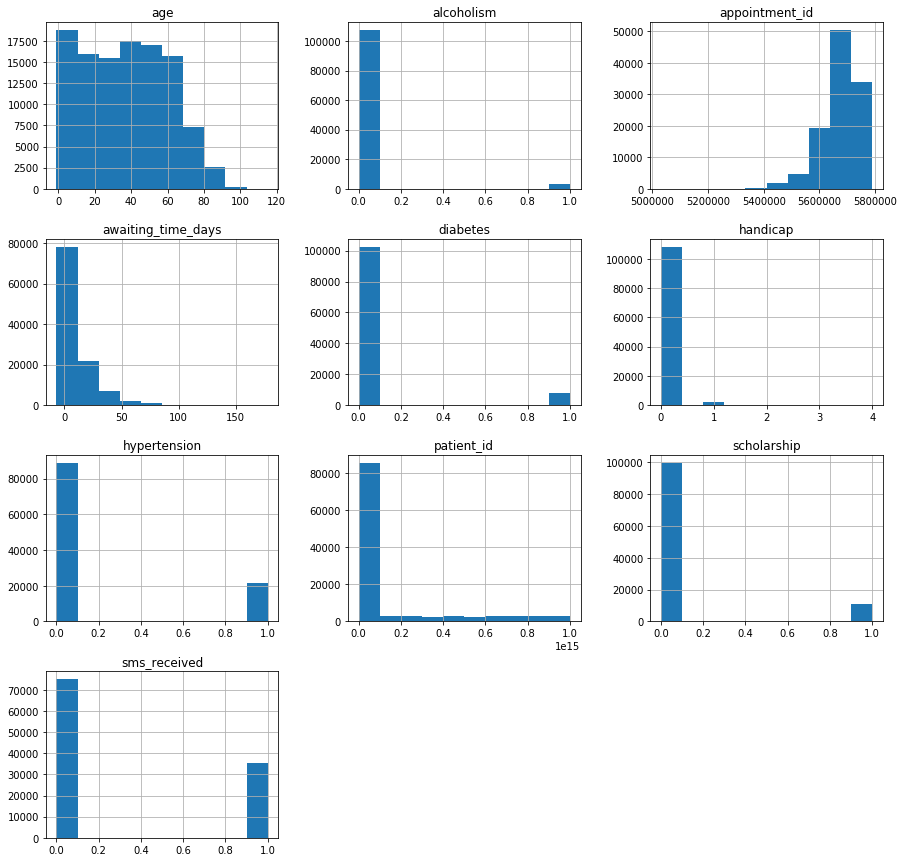

In [18]:
df.hist(figsize = (15,15));

### Histrogram Observations
   1. Most of the patients are very young people in the dataset,and the number goes down rapidly for patients above 60.
   2. Less than 20000 patients receive scholarship
   3. Comparing alcoholism, diabetes and hypertension it found that more than 20000 people have hypertension where as less than 10000 people have diabetes or alcoholism, comparing alcoholism and diabetes it is found that dataset has more patients with diabetes than alcoholism.
     


### Finding Unique Values
Finding unique values for different variables for unexpected values.

In [19]:
lst = list(df.columns)
for col in lst:
    print("Unique Values in '{}' are {}".format(col,df['{}'.format(col)].unique()),end="\n\n")

Unique Values in 'patient_id' are [ 29872499824296 558997776694438   4262962299951 ...  72633149253362
 996997666245785  15576631729893]

Unique Values in 'appointment_id' are [5642903 5642503 5642549 ... 5630692 5630323 5629448]

Unique Values in 'gender' are ['F' 'M']

Unique Values in 'scheduled_day' are <DatetimeArray>
['2016-04-29 18:38:08+00:00', '2016-04-29 16:08:27+00:00',
 '2016-04-29 16:19:04+00:00', '2016-04-29 17:29:31+00:00',
 '2016-04-29 16:07:23+00:00', '2016-04-27 08:36:51+00:00',
 '2016-04-27 15:05:12+00:00', '2016-04-27 15:39:58+00:00',
 '2016-04-29 08:02:16+00:00', '2016-04-27 12:48:25+00:00',
 ...
 '2016-06-07 07:45:16+00:00', '2016-06-07 07:38:34+00:00',
 '2016-04-27 15:15:06+00:00', '2016-05-03 07:51:47+00:00',
 '2016-05-03 08:23:40+00:00', '2016-05-03 09:15:35+00:00',
 '2016-05-03 07:27:33+00:00', '2016-04-27 16:03:52+00:00',
 '2016-04-27 15:09:23+00:00', '2016-04-27 13:30:56+00:00']
Length: 103549, dtype: datetime64[ns, UTC]

Unique Values in 'appointment_day' a

### Observations from Unique Values

It is observed that most of the variables have values that were supposed to be there, However it was observed some variables like:
- <b>Age: </b> values cannot be less than 0, as that is simply not possible, therefore all values less than 0 will be removed from the dataset.
- <b>Handicap: </b> There are too many values other than 0 or 1, they can be considered as typos or they must be signifying the kind of disablility of the patient, however for our analysis, the detail of a patient's kind of disability does not make much sense therefore, these values would not be changed.
- <b>Awaiting time days: </b> awaiting time cannot be less than 0,it is assumed that,it simply not possible to visit without scheduled appointment.

In [20]:
#Showing the negative Values
df.query("age < 0")

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,awaiting_time_days,appointment_dow
99832,465943158731293,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,-1,Monday


In [21]:
df.drop(99832,inplace = True)

In [22]:
#Checking the negative Values
df.query("age < 0")

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,awaiting_time_days,appointment_dow


It can be beneficial to explore more about age

Let's see the boxplot of the variable to find out more about the outliers

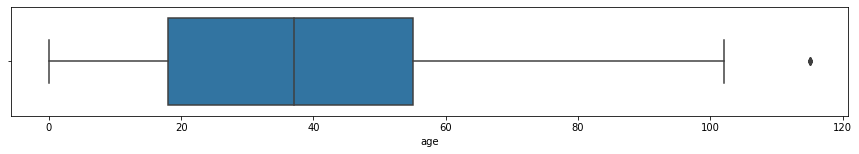

In [23]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df.age);

As, it is observed that we have a outlier.

Let's plot a histogram to show the frequency of each age

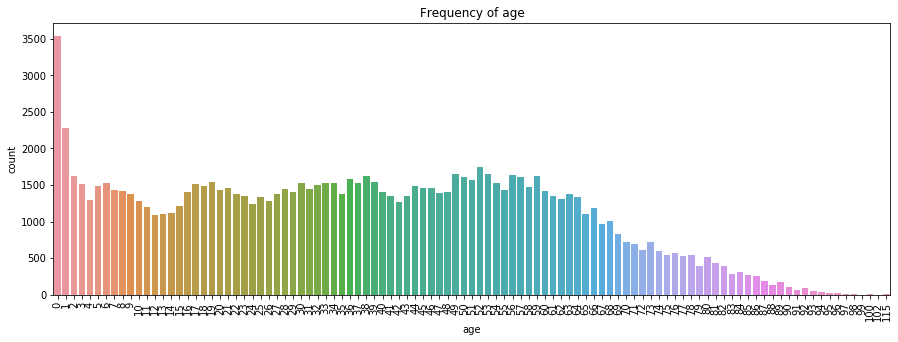

In [24]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 90)
sns.countplot(x = df.age).set_title("Frequency of age")
plt.show()

- As, it is observed that the peak is for age = 0, that is for the infants the frequency is the largest

- Infants have the largest frequency, after that the histogram is mostly uniform, till the age of 60

- Also, after the age of 60 the histogram is rightly skewwed.

Removing rows for which awaiting time is negative

In [25]:
rows = df[df.awaiting_time_days < 0 ].index
df.drop(rows,inplace = True)

In [26]:
#checking for awaiting_time_days < 0
df.query('awaiting_time_days < 0')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,awaiting_time_days,appointment_dow


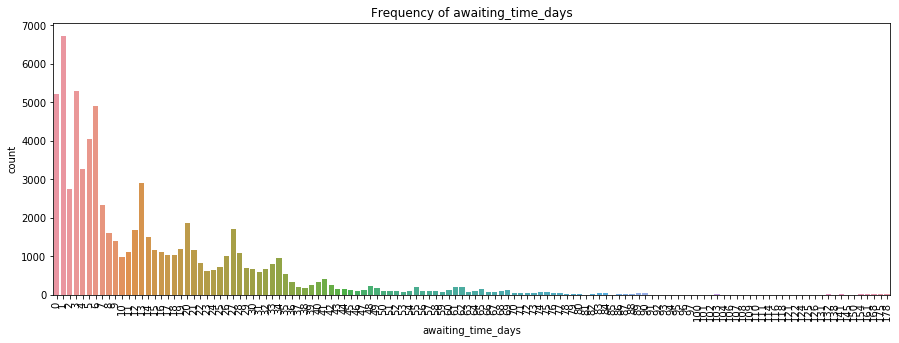

In [27]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 90)
sns.countplot(x = df.awaiting_time_days).set_title("Frequency of awaiting_time_days")
plt.show()

Let's find out how many patients scheduled their visit for the same day

In [28]:
awaiting0 = df.query('awaiting_time_days == 0').count()
print(awaiting0.values)

[5213 5213 5213 5213 5213 5213 5213 5213 5213 5213 5213 5213 5213 5213
 5213 5213]


It is worth noticing that around 5k patients scheduled their appointment for the same day.


Let's check how many of those patients show up for the appointment

In [29]:
show_up = len(df.query("awaiting_time_days == 0 and no_show == 'No'"))
total = len(df.query("awaiting_time_days == 0"))

print ("Around {}% of people showed up on the same day they scheduled their appointment".format(float((show_up/total))*100))

Around 78.64953002110109% of people showed up on the same day they scheduled their appointment


Let's see in what time period most of the visits happen from being scheduled

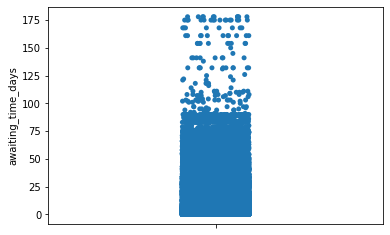

In [30]:
# It seems that most of the visits happened within 3 months from being scheduled
sns.stripplot(y = df['awaiting_time_days'])
plt.show();

#### Observing scheduled_day

In [31]:
print("Scheduling for visits started on {}".format(df['scheduled_day'].min()))
print("Scheduling for visits ending on {}".format(df['scheduled_day'].max()))

Scheduling for visits started on 2015-11-10 07:13:56+00:00
Scheduling for visits ending on 2016-06-07 19:03:57+00:00


Plotting a histogram of 'scheduled_day' to observe it's distribution

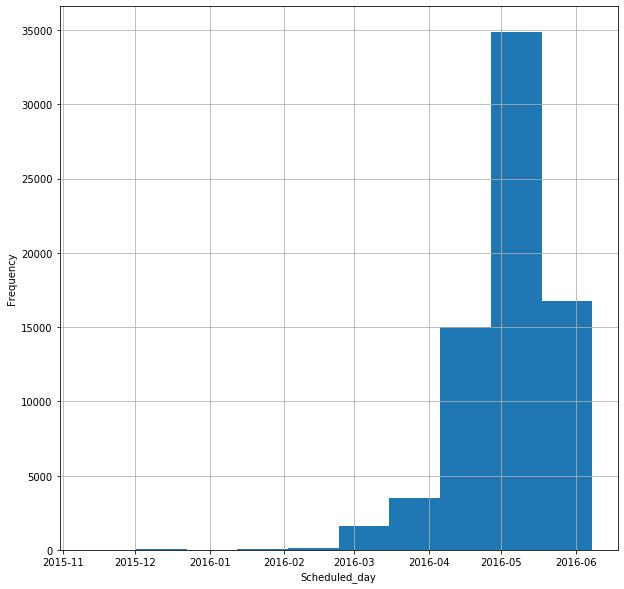

In [32]:
plt.figure(figsize=(10,10))
plt.ylabel("Frequency")
plt.xlabel("Scheduled_day")
df['scheduled_day'].hist();

It can be observed from the histogram that the distribution of 'scheduled_day' is <b>left skewed</b>.

#### Observing appointment_day

In [33]:
print("Appointment for visits started on {}".format(df['appointment_day'].min()))
print("Appointment for visits ending on {}".format(df['appointment_day'].max()))

Appointment for visits started on 2016-04-29 00:00:00+00:00
Appointment for visits ending on 2016-06-08 00:00:00+00:00


Plotting a histogram of 'appointment_day' to observe it's distribution

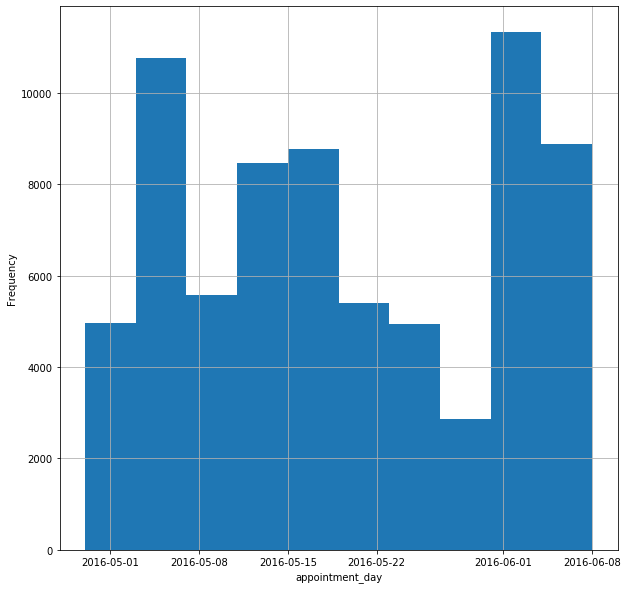

In [34]:
plt.figure(figsize = (10,10))
plt.ylabel("Frequency")
plt.xlabel("appointment_day")
df['appointment_day'].hist();

### Questions

The given dataset has been properly formatted and observed now, I have created a list of questions 
that will help in further analysis of the dataset and will uncover some new facts about the data.

1. How many people or what percent of the population missed their scheduled appointment ?

2. What is the gender distribution for show/ no-show of patients ?
3. What is the distribution show/ no-show of patients based on their neighbourhood ?
4. Are there patients with more than one appointments ? If yes ,list the top 10 patients with most appointments.
5. What are the important factors for predicting whether a patient will show up for appointment or not?


<a id='eda'></a>
# Exploratory Data Analysis


### How many people or what percent of the population missed their scheduled appointment ?

In [35]:
total_patients = df.shape[0]
print(total_patients)
missing_patients = len(df.query("no_show == 'Yes'"))
print("Number of patients who missed their appointment: {}".format(missing_patients))
print("Percentage of patients who missed their appointment: {} %".format(round((missing_patients/total_patients)*100,2)))

71959
Number of patients who missed their appointment: 20522
Percentage of patients who missed their appointment: 28.52 %


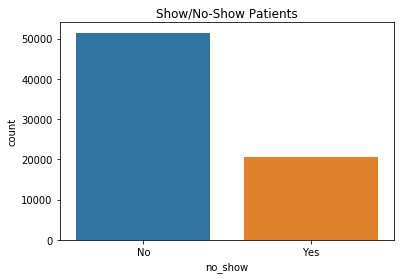

In [36]:
plt.title("Show/No-Show Patients")
plt.ylabel("count")
plt.xlabel("no_show")
sns.countplot(x = df['no_show']);
plt.show();

### What is the gender distribution for show/ no-show of patients ?


In [37]:
appointments_f = len(df.query("gender == 'F'"))
appointments_m = len(df.query('gender == "M"'))

missed_app_f = len(df.query("gender == 'F' and no_show == 'Yes'"))
missed_app_m = len(df.query("gender == 'M' and no_show == 'Yes'"))

print("Percent of appointments missed by females = {}%".format(round((missed_app_f/appointments_f)*100,2)))
print("Percent of appointments missed by males = {}%".format(round((missed_app_m/appointments_m)*100,2)))

Percent of appointments missed by females = 28.45%
Percent of appointments missed by males = 28.67%


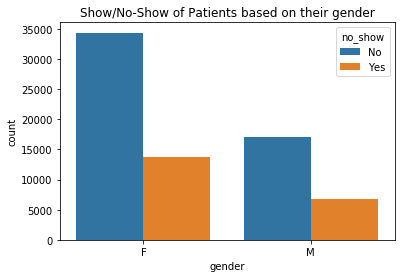

In [38]:
plt.title("Show/No-Show of Patients based on their gender")
plt.ylabel("count")
plt.xlabel("no_show")
sns.countplot(x = df['gender'],hue =df['no_show'],data = df);
plt.show();

###  What is the distribution show/ no-show of patients based on their neighbourhood ?


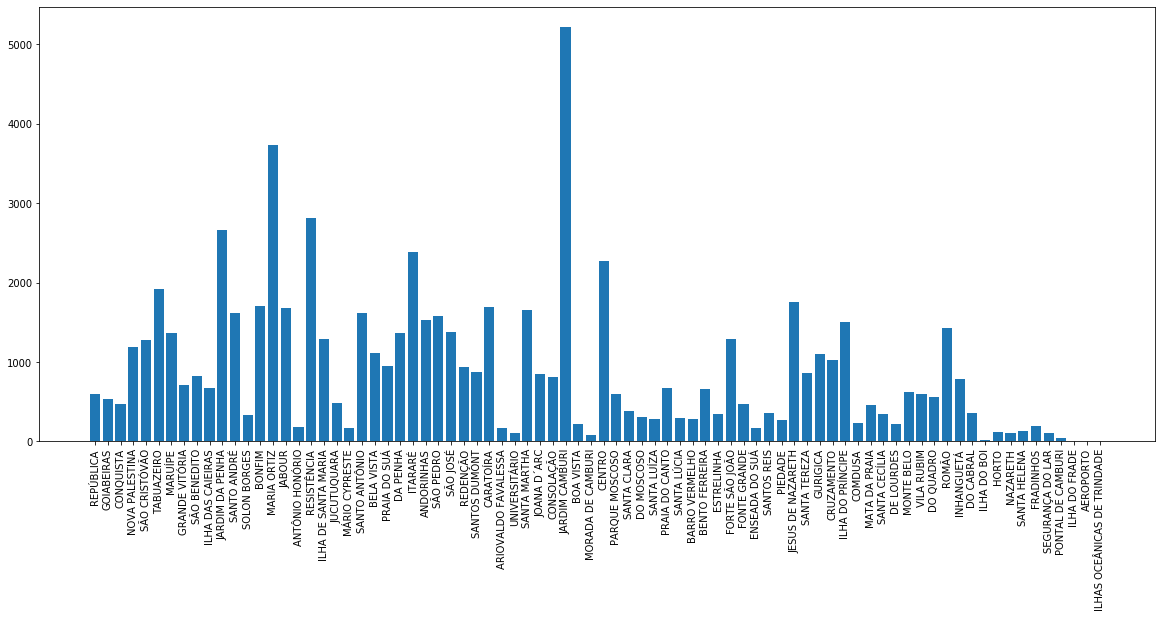

In [40]:
neighbourhood = df['neighbourhood'].unique()
count = []
for i in range(len(neighbourhood)):
    count.append(len(df.query('neighbourhood == "{}"'.format(neighbourhood[i]))))
#print(len(neighbourhood))
plt.figure(figsize = (20,8))
plt.xticks(rotation = 90)
plt.bar(neighbourhood,count)
plt.show();

It is observed that most scheduled appointment are in the neighbourhood of <b>JARDIM CAMBURI</b> with more than 5k appointments

It is also observed that least scheduled appointments were from the neighbourhood of <b>ILHAS OCEÂNICAS DE TRINDADE</b> of just 2 appointments

### Are there patients with more than one appointments ? If yes ,list the top 10 patients with most appointments.

In [41]:
df['patient_id'].value_counts().iloc[0:10]

1484143378533      30
32351482915        20
38899547972932     20
17798942295934     20
37994336685892     19
579448128831       19
6285945381692      19
787697428886813    18
863266615443557    17
548284689473265    17
Name: patient_id, dtype: int64

Patient with multiple appointments are present. The number of appointments of top 10 patients range from 30 to 17. Taking into consideration, that the time range of visits appointed spans over 1.5 months.

### What are the important factors for predicting whether a patient will show up for appointment or not?


Let's take a look at the categorical variables

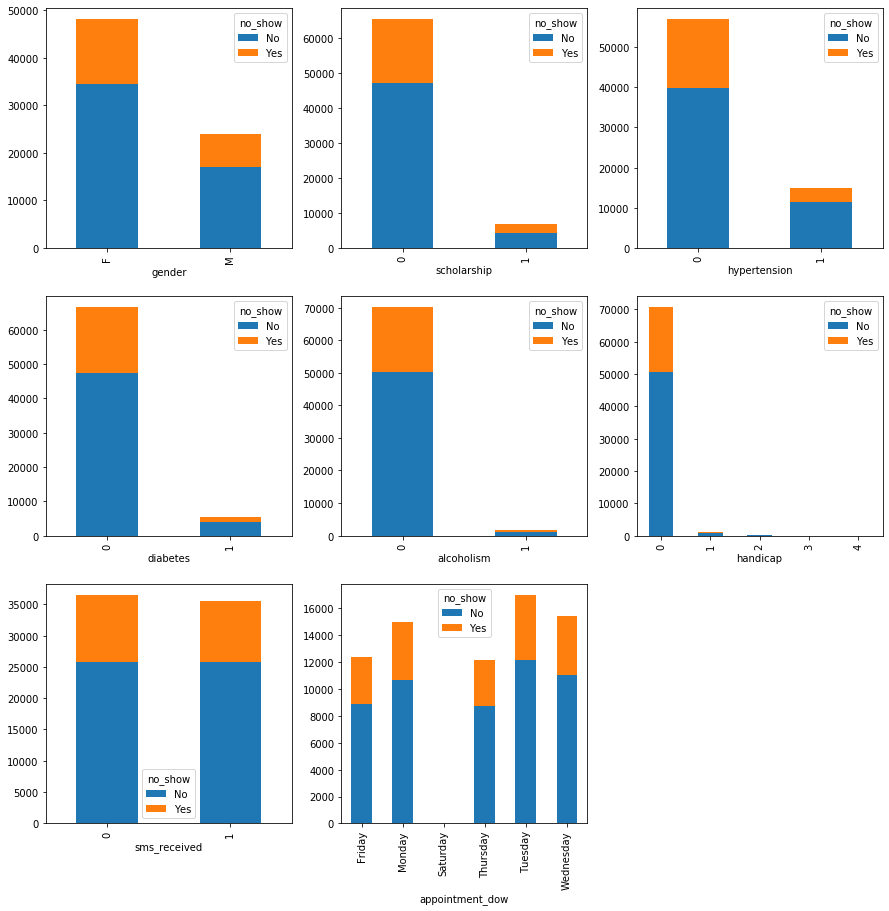

In [42]:
cate_vars = ['gender', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'appointment_dow']
fig = plt.figure(figsize = (15,15))
for i,var in enumerate(cate_vars):
    sub = fig.add_subplot(3,3,i+1)
    df.groupby([var,'no_show'])[var].count().unstack('no_show').plot(ax = sub,kind='bar',stacked =True)

It is observed that for all the categorical variables of show/no-show for different
variables look very similar,There is no critical indication of any these variables having more impact on 
show/no-show characteristics.

<a id='conclusions'></a>
# Conclusions


I have observed and analyzed the dataset, it had few problems like formatting of variables,removing wrong data,unifying some columns and adding new features based on existing data. I have also managed to investigate most of the independent variables in the dataset and came to the conclusion that there is no clear indication, of which categorical variable affects the show/no-show of a patient.Some of the other interesting observations are listed below:

The most important observations are:
- Scheduling visits started on:<b>2015-11-10</b> and ended on <b>2016-06-07</b>.

- Appointment visits started on:<b>2016-04-29</b> and ended on <b>2016-06-08</b>.

- It is obsereved that days which are in the start of the week are much busy as compared to the days at the end of the week appointments on Saturday as astonishingly low ,just 24 appointments.

- The patients are 37 years old on average.25% of the patients are below 18, and most of them are below 55.

- About 32 % of the patients received the SMS.

- Disability is represented by 4 classes, as opposed to other categorical variables in this dataset.This can be an error or there are 4 different categories used here.

- Awaiting time is on avrage 9 days, 50% of the patients waited for 3 days and 75% of the patients waited for 14 days.

- Most of the patients are very young people in the dataset,and the number goes down rapidly for patients above 60.
- Less than 20000 patients receive scholarship.

- Comparing alcoholism, diabetes and hypertension it found that more than 20000 people have hypertension where as less than 10000 people have diabetes or alcoholism, comparing alcoholism and diabetes it is found that dataset has more patients with diabetes than alcoholism.

- Infants are the largest group of patients.

- It was observed that the histogram of Frequency of age is right-skewed after the age of 60.

- It is worth noticing that around 5k patients scheduled their appointment for the same day.

- Around 78% of people showed up on the same day on which they scheduled their appointment

- Out of 71959 patients , number of patients who missed their appointment are 20522.

- Percentage of patients who missed their appointment: 28.52 %

- It was observed that females tend to schedule more visits than men.

- Percent of appointments missed by females = 28.45%

- Percent of appointments missed by males = 28.67%

- It is observed that most scheduled appointment are in the neighbourhood of JARDIM CAMBURI with more than 5k appointments.

- It is also observed that least scheduled appointments were from the neighbourhood of ILHAS OCEÂNICAS DE TRINDADE of just 2 appointments.

- Patient with multiple appointments are present. The number of appointments of top 10 patients range from 30 to 17. Taking into consideration, that the time range of visits appointed spans over 1.5 months.